# PmodTMP2 Sensor example

In this example, the Pmod temperature sensor is initialized and set to log a reading every 1 second. 

This examples required the PmodTMP2 sensor, and assumed it is attached to PMODB.

### 1. Simple TMP2 read() to see current room temperature

In [1]:
from pynq import Overlay
Overlay("base.bit").download()

In [2]:
from pynq.iop import Pmod_TMP2
from pynq.iop import PMODA

mytmp = Pmod_TMP2(PMODA)
temperature = mytmp.read()

print(str(temperature) + " C")

200.8 C


### 2. Starting logging temperature once every second

In [18]:
mytmp.start_log()

### 3. Try to modify temperature reading by touching the sensor

The default interval between samples is 1 second. So wait for at least 10 seconds to get enough samples.

During this period, try to press finger on the sensor to increase its temperature reading.

Stop the logging whenever done trying to change sensor's value.

In [19]:
mytmp.stop_log()
log = mytmp.get_log()

### 5. Plot values over time

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


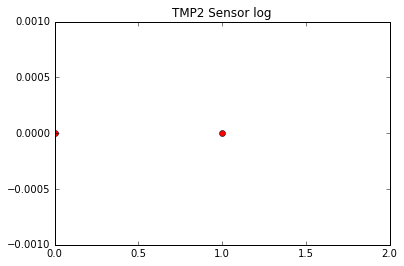

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(log)), log, 'ro')
plt.title('TMP2 Sensor log')
plt.axis([0, len(log), min(log), max(log)])
plt.show()